<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/aljadaaa_Data_Cleaning_Linear_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Regression

This lab is designed to challenge you to apply existing knowledge from previous lectures into real-world practices. We will be writing codes to run two of machine learning's most used algorithms: Linear and Logistic Regression. You might encounter some errors early, so don't start late!


### Instructions
1. For Linear Regression try solving the equations from scratch. If you use any library to do the regression (like LinearRegression from sklearn) you only be graded out of 10.

2. Make sure all plots, outputs and intermediate results are visible in the final pdf that you submit.

### Submission guide
Save a copy as UniqueID_Lab2.ipynb and submit the file to Canvas, or a link to the file is ok. Make sure it is shared.

In [1]:
# import libraries here
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# library for responsive graphs


%matplotlib inline

## Q1: Linear Regression (15pts)

We will use this Abalone dataset shared by Nima Pourmoradi for linear regression.

https://www.kaggle.com/datasets/nimapourmoradi/abalones-age

In [2]:
# TODO: Import and read the dataset.
# this dataset can be loaded directly using seaborn or pandas. Do some research.
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nimapourmoradi/abalones-age
!unzip abalones-age.zip
# please note it is installed


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/abalones-age
License(s): other
  0% 0.00/57.8k [00:00<?, ?B/s]
100% 57.8k/57.8k [00:00<00:00, 12.5MB/s]
Archive:  abalones-age.zip
  inflating: abalone.data.csv        


In [3]:
df = pd.read_csv('/content/abalone.data.csv')

Now that you have successfully import and read the dataset, take some time to understand the entire structure, focusing on each feature and the target variable (quality score? another kind of metric?)

In [4]:
# uncomment these to learn more about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         4177 non-null   object 
 1   Length                      4177 non-null   float64
 2   Diameter                    4177 non-null   float64
 3   Height                      4177 non-null   float64
 4   Whole weightShucked weight  4177 non-null   float64
 5   Viscera weight              4177 non-null   float64
 6   Shell weight                4177 non-null   float64
 7   Rings                       4177 non-null   float64
 8   Age                         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Visualizing the data

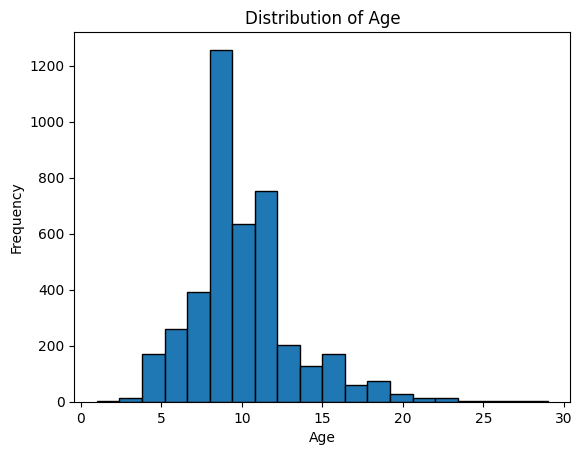

In [5]:
# TODO: Plot a histogram showing the distribution of Age.
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Cleaning the data

In [6]:
# TODO: Rename the long column name to make plotting easier
# The error concatenated two column names together, rename to something more appropriate
# Rename the column to a more appropriate name
df.rename(columns={"Whole weightShucked weight": "Combined Weight"}, inplace=True)
df.head()


,Sex,Length,Diameter,Height,Combined Weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Splitting the data

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

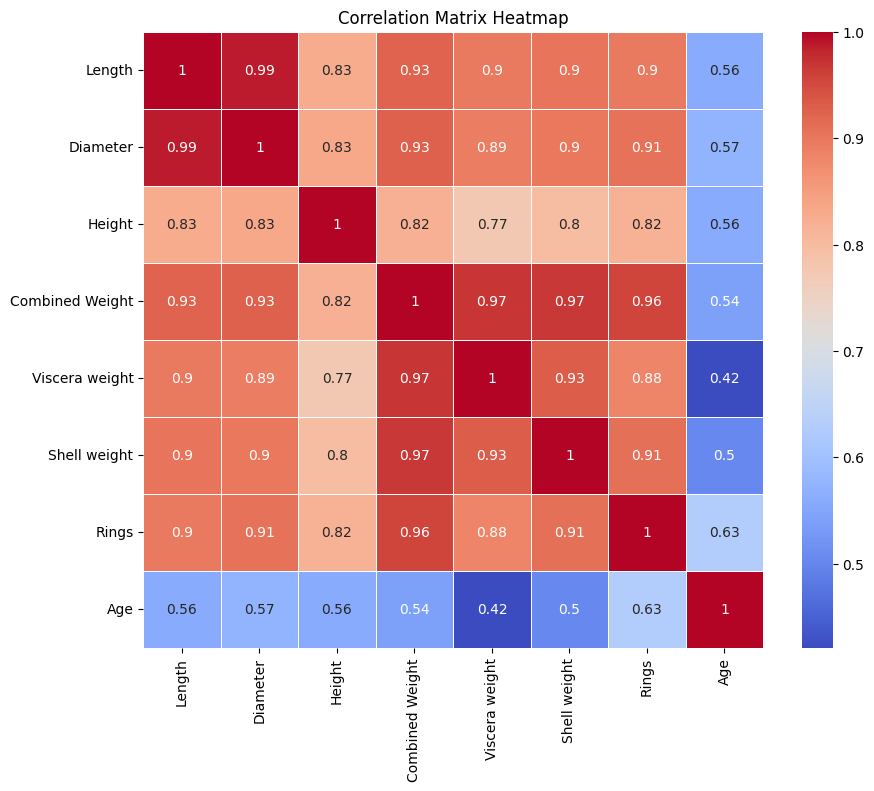

In [7]:
# TODO: Plot a heatmap showing the correlation matrix for the dataframe
# Only consider numerical data (no objects like dates or strings)
# It can help assess whether there is a linear distribution in the dataset
# Select only the numerical data from the dataframe

numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')


In [8]:
# TODO: We will try to predict the size of the abalone's rings
# So your dependent variable (y) is 'Rings'
# Choose an appropriate independent variable (x)
# Explain your reasoning behind your choice
"""
I am planning to use all apove .9 and the reason behind that that haave very strong corellations with the y and the same time not corellated
with each other independent vars as much as possible
 and using the normal equation
 Note the above note was my first note, but after getting multiple singular matrix, i start focusing more about the correlation
 and noticed that combined weights features it is very correlated with y and all other features (which is making sense) so i will use this only and change my approach

"""
strong_correlations = correlation_matrix['Rings']
strong_correlations

,Rings
Length,0.897706
Diameter,0.905330
Height,0.817338
Combined Weight,0.955355
Viscera weight,0.882617
Shell weight,0.907656
Rings,1.000000
Age,0.627574


In [9]:
rings = numerical_data["Rings"]
numerical_data = numerical_data['Combined Weight']

X_train, X_test, y_train, y_test = train_test_split(numerical_data, rings, test_size=0.3, random_state=42)
X_train, y_train

(2830    0.8435
 925     0.3645
 3845    0.4160
 547     0.0425
 2259    1.1005
          ...  
 3444    0.5690
 466     1.3905
 3092    0.5805
 3772    1.0535
 860     1.1405
 Name: Combined Weight, Length: 2923, dtype: float64,
 2830    0.1815
 925     0.1050
 3845    0.1450
 547     0.0155
 2259    0.2950
          ...  
 3444    0.1450
 466     0.4000
 3092    0.1880
 3772    0.2350
 860     0.2710
 Name: Rings, Length: 2923, dtype: float64)

### Train the Linear Regression Model

In [10]:
num = np.sum((X_train - X_train.mean()) * (y_train - y_train.mean()))
denom = np.sum((X_train - X_train.mean()) ** 2)

b1 = num/denom
b0 = y_train.mean() - (b1 * X_train.mean())


print(b1, b0)

0.2730917922187911 0.012891640291799705


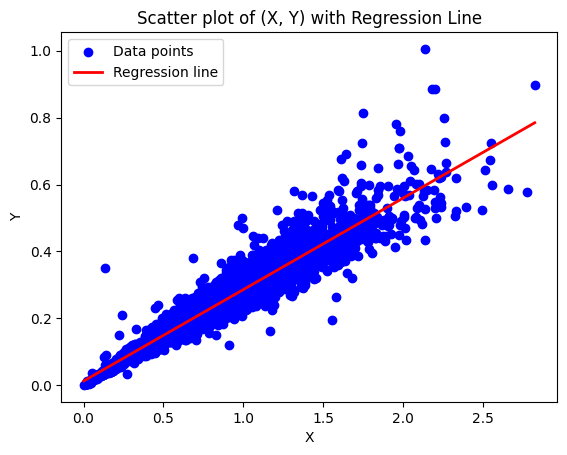

In [11]:
# TODO: Plot a scatter plot of (x,y) and also plot the regression line

plt.scatter(X_train, y_train, color='blue', label='Data points')

x_line = np.linspace(X_train.min(), X_train.max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of (X, Y) with Regression Line')
plt.legend()
plt.show()



### Evaluate the model

In [12]:
# TODO: What is the RMSE for test predictions? What is the R-square accuracy?
y_pred = b0 + b1 * X_test

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

RMSE: 0.040961847257726634
R²: 0.9090316461041956


## Q2: Logistic Regression (15pts)

We will use [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), which is included in scikit-learn library for logistic regression analysis.

This dataset provides measurements from digitized images of breast mass collected from patients. The goal is to classify the observations into 2 categories: malignant (cancerous) or benign (non-cancerous). There are 30 numerical features present in the images. The target variable is binary, making it suitable for logistic regression tasks.

In [13]:
# TODO: Import and load the dataset. Do the research
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 29.7MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [14]:
# TODO: convert the dataset into a pandas dataframe
# Question: Why converting into a DataFrame? What's the benefits?
"""
the ans: because who don't love pandas 🐼, and moreover of that pandas as we taught by Dr Vaskar are very helpful
in cleaning the data
very helpful in visualize the data
very easy to use
and has a good community public, so all what we need few searches and you can get a huge results
using dataframe would handleing the data very effecient in different cases and let us do different tasks on our data easily
"""
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Visualizing the data

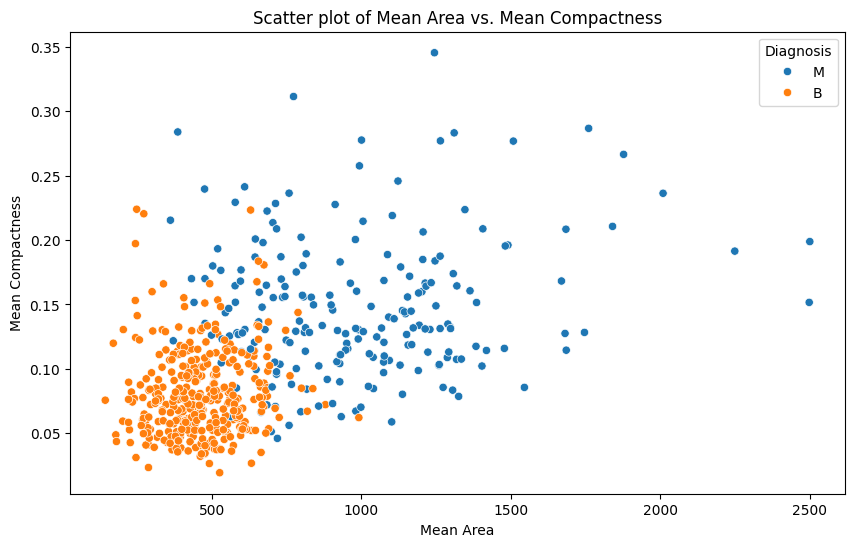

In [15]:
# TODO: Plot a scatter plot for 2 features and the label
# Add a legend so the plot is readable
# Features: Mean Area and Mean Compactness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_mean', y='compactness_mean', hue='diagnosis')

# Adding title and labels
plt.title('Scatter plot of Mean Area vs. Mean Compactness')
plt.xlabel('Mean Area')
plt.ylabel('Mean Compactness')
plt.legend(title='Diagnosis')
plt.show()

### Data Preprocessing

In [16]:
# TODO: Consider only averages features for out task
# Drop all feature columns except the average (or mean) features
# How many features do we have now? 10
mean_features = [col for col in df.columns if 'mean' in col]
df_mean = df[mean_features]
print("Remaining mean features:", df_mean.columns)
num_mean_features = df_mean.shape[1]
print("Number of mean features:", num_mean_features)


Remaining mean features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Number of mean features: 10


### Splitting the Data

In [17]:
# To train the data, we first need to prepare the data
# TODO: Make the train-test split
y = df['diagnosis']
X = df[df_mean.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (398, 10)
Test set shape: (171, 10)


### Training

In [18]:
# Now we can train a logistic regression model on the training data
# TODO: Make a pandas dataframe for the training dataset including the labels
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
# TODO: Use the logistic regression function from sklearn library to train the model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

### Evaluation

In [20]:
# TODO: Predict the y values for the test dataset
y_pred = log_reg.predict(X_test)
y_pred


array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B'], dtype=object)

In [21]:
# TODO: Calculate the accuracy, precision, and recall scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [22]:
# Plot the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[101   7]
 [  4  59]]
